In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data and finding insights on it 

In [5]:
df = pd.read_csv('Ecommerce Customers')

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.sample(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
71,marc54@hotmail.com,Unit 6174 Box 1949\nDPO AP 27478,SandyBrown,34.335896,12.228935,36.157191,4.694322,595.822837
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
272,jennifer24@hotmail.com,"46954 Melissa Corner\nNorth Amanda, LA 34844",SteelBlue,34.436426,13.325469,36.768603,3.371258,582.491924
358,francesjohnson@lee.com,"577 Peters Turnpike\nLoriport, MA 60572-1669",Aquamarine,32.655397,11.918860,35.716269,2.159676,382.416108
222,sanchezkara@hotmail.com,"40494 Robert Park\nHeatherside, IL 70364",SlateBlue,34.334865,11.109456,38.585855,3.892891,502.409785


In [4]:
df.shape

(500, 8)

In [5]:
df.info()
#gives information about the type of data in every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [37]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [39]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Plotting graphs to analyse relationship b/w any two columns

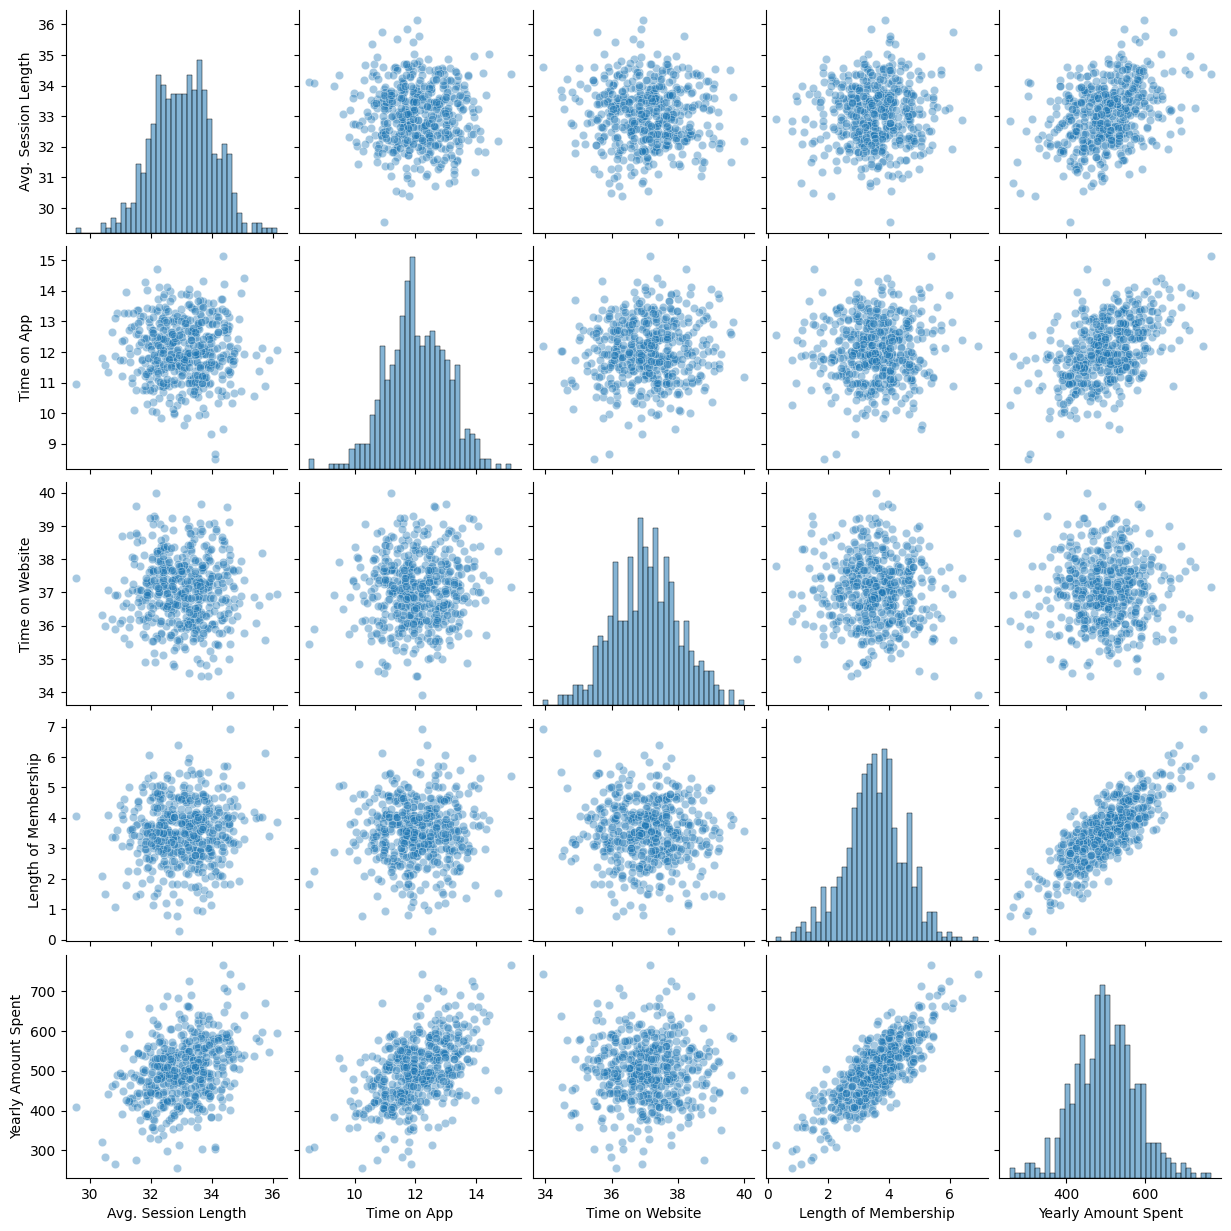

In [10]:
#creates a matrix of scatterplots and histograms to visualize pairwise relationships and distributions among all numerical variables
sns.pairplot(df, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

In [40]:
df_num = df.select_dtypes(exclude = ['object']) 

<Axes: >

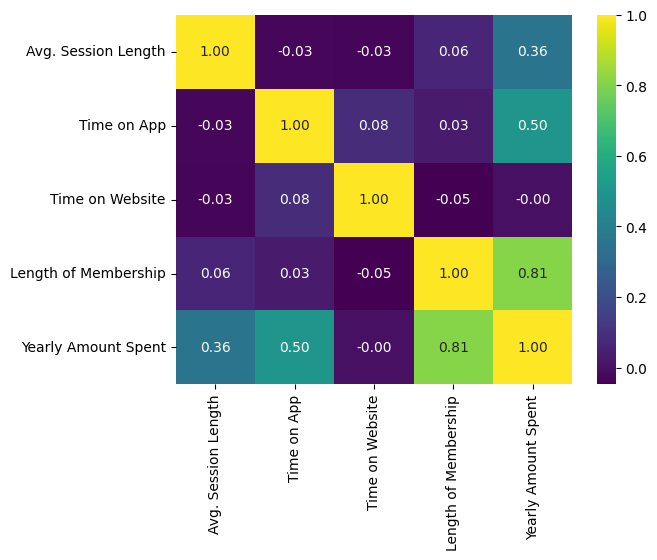

In [42]:
sns.heatmap(df_num.corr(), annot = True, cmap = 'viridis', fmt = '.2f')
#a much better way of showing the above matrix - the closer the value to 1, more the relation

#### From the correlation heatmap we can observe there are particularly and more prominently 2 attributes which can influence the yearly amount spent
1. Time on App
2. Length of Membership

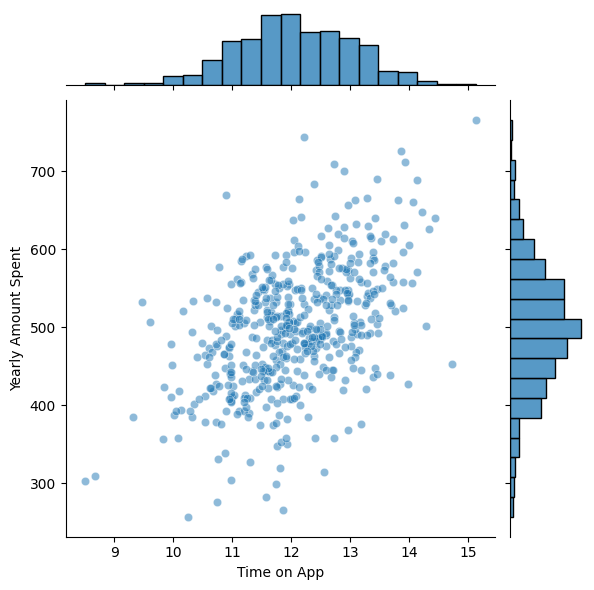

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, alpha=0.5)
#more the time spent on the application, more the money is spent - forms a linear relationship

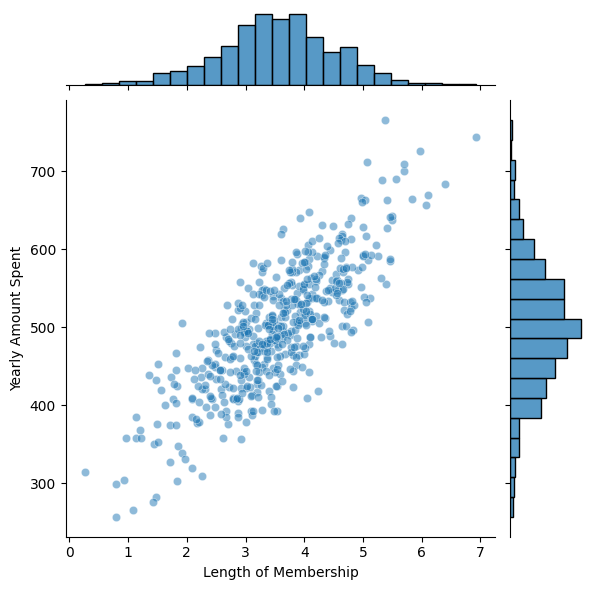

In [43]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=df, alpha=0.5)
#more the time spent on the application, more the money is spent - forms a linear relationship

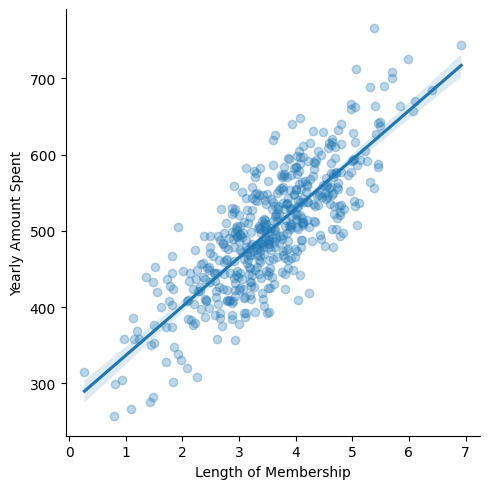

In [11]:
#since length of membership and yearly amount spent has a more linear distribution - we choose to work on it 
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=df,
           scatter_kws={'alpha':0.3})

### Splitting the data 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [17]:
X.head()
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [19]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


### Training the Model with multivariable regression using Scikit Learn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
lm.coef_
#as for the equation of a line => y = mx + b (y = B0 + B1x)

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [24]:
# The coefficients in a dataframe - higher the coeff, more important the variable
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


### Training the model with multivariable regression using OLS

In [25]:
import statsmodels.api as sm

In [26]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Wed, 09 Jul 2025   Prob (F-statistic):          3.46e-315
Time:                         09:34:20   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

### Predicting Test Data

In [27]:
predictions = lm.predict(X_test)

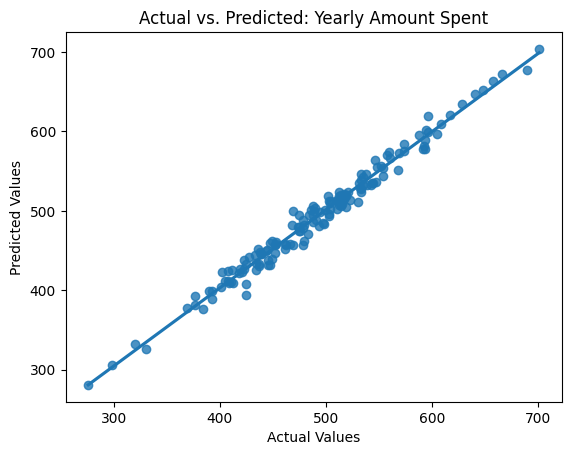

In [28]:
# Scatter plot of actual values of y vs predicted values.
sns.regplot(x=y_test, y=predictions, ci=None)  # ci=None hides the confidence interval
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted: Yearly Amount Spent')
plt.show()

### Evaluation of the model

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [30]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432116
Mean Squared Error: 103.91554136503333
Root Mean Squared Error: 10.193897260863155


### Residuals 

C:\Users\DELL\AppData\Local\Temp\ipykernel_1356\2089492223.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

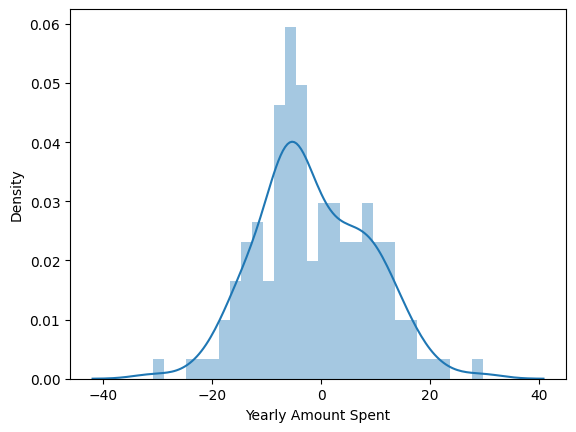

In [36]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)
#normal-ish distribution

In [33]:
import pylab 
import scipy.stats as stats

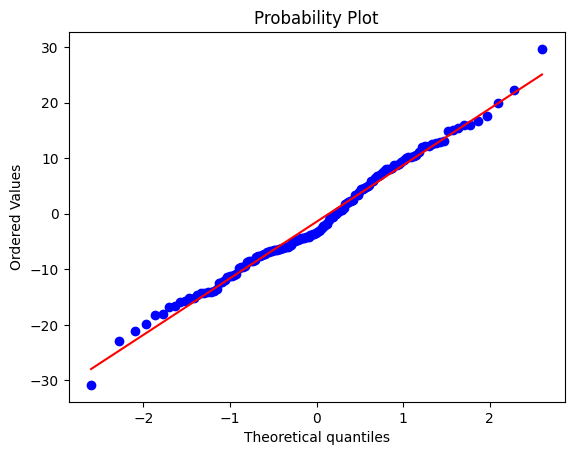

In [34]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()